# Clean Part 1 Data

#### Includes code to clean part 1 data: 
1. validate number of high- and low-curiosity questions in dataset
2. understand curiosity distribution for a given participant
3. check for accuracy (good participants)
4. create the memory and dm task stimuli for part 2

In [5]:
# SET-UP
import pandas as pd
import os
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# set working directory
os.chdir('/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference') 

################ UPDATE SUBJECT ID
# define subject_id
subject_id = 'PIL068'

# Clean Part 1 Data

In [9]:
# Load in part 1 data
pt1_data = pd.read_csv(f'/Users/agshivers/Library/CloudStorage/Box-Box/Bakkour-Lab/projects/curiosity_incidental_preference/data/pilot_data/curiosity-pref-part1_{subject_id}.csv'
)
pt1_data

,rt,response,trial_type,trial_index,plugin_version,time_elapsed,run_id,condition,recorded_at,source_code_version,...,timeout,failed_images,failed_audio,failed_video,image,curiosity_label,response_time,task,password_timestamp,is_final_trial
0,33350.0,"{""Q0"":""Njoroge89""}",survey-text,0,2.0.0,33392,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13029.0,"{""Q0"":""L4RLT6PIL068""}",survey-text,1,2.0.0,49563,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30305.0,NaN,fullscreen,2,2.0.0,80873,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39395.0,0,html-button-response,3,2.0.0,120273,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7483.0,0,html-button-response,4,2.0.0,128061,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,NaN,NaN,html-keyboard-response,1583,2.0.0,4874624,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feedback,NaN,NaN
1551,NaN,NaN,html-keyboard-response,1584,2.0.0,4877650,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,html-keyboard-response,1585,2.0.0,4881155,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,html-keyboard-response,1586,2.0.0,4882695,156,1,2025-04-23 20:34:43,6243c74e693b5050ab4b7ff1e39be8b6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# make "selected_questions" dataframe
# df containing the trivia questions and paired images to be used in future study parts
# extract selected_questions_with_images column from data output and turn into a dataframe 

# extract selected_questions_with_images from the first row with data (all rows are the same, showing the full selected_questions)
question_records = []

# find the first row with non-null selected_questions_with_images
first_valid_row = pt1_data.dropna(subset=["selected_questions_with_images"]).iloc[0]

try:
    questions_list = json.loads(first_valid_row["selected_questions_with_images"])
    for question in questions_list:
        question_records.append({
            "subject_id": first_valid_row["subject_id"],
            "question": question["question"],
            "answer": question["answer"],
            "curiosity_label": question["label"],
            "image": question["image"]
        })
except json.JSONDecodeError:
    print(f"Error decoding JSON in the selected questions row")

questions_df = pd.DataFrame(question_records)
questions_df.head()

,subject_id,question,answer,curiosity_label,image
0,PIL068,"In which country is Angel Falls, the tallest w...",Venezuela,high-curiosity,novel252.jpg
1,PIL068,What is an ice hockey puck made from?,Rubber,high-curiosity,novel097.jpg
2,PIL068,What is the more common name of the plant Hedera?,Ivy,high-curiosity,novel124.jpg
3,PIL068,What food product did Hippolyte Mege-Mouries i...,Margarine,low-curiosity,novel135.jpg
4,PIL068,What is the only lizard that has a voice?,Gecko,high-curiosity,novel368.jpg


# Verify eligibility to move onto Part 2
## First, verify the number of questions to move onto Part 2
Need 96 questions total, with 48 high- and 48 low-curiosity questions

### Verify selected_questions dataframe counts

In [11]:
# check number of selected questions, high-curiosity, and low-curiosity questions in selected_questions df

# count high and low curiosity questions
high_curiosity_count = len(questions_df[questions_df['curiosity_label'] == 'high-curiosity'])
low_curiosity_count = len(questions_df[questions_df['curiosity_label'] == 'low-curiosity'])

print("Selected_questions dataframe counts:")

# check number of selected questions (need 96 to continue to part 2)
print(f"Total unique questions: {len(questions_df)}")

# check number of high-curiosity questions (need 48 to continue to part 2)
print(f"High curiosity questions: {high_curiosity_count}")

# check number of low-curiosity questions (need 48 to continue to part 2)
print(f"Low curiosity questions: {low_curiosity_count}")

Selected_questions dataframe counts:
Total unique questions: 96
High curiosity questions: 48
Low curiosity questions: 48


### Verify counts from original dataframe 
(this is a sanity check. should match counts in selected_questions)

In [12]:
# count high and low curiosity ratings in the original dataframe, where confidence is not 4
original_high_count = len(pt1_data[(pt1_data['trial_label'] == 'high-curiosity') & (pt1_data['confidence_rating'] != 4)])
original_low_count = len(pt1_data[(pt1_data['trial_label'] == 'low-curiosity') & (pt1_data['confidence_rating'] != 4)])

print("Original dataframe counts:")
print(f"Total questions in dataset: {original_high_count + original_low_count}")
print(f"High curiosity trials: {original_high_count}")
print(f"Low curiosity trials: {original_low_count}")

Original dataframe counts:
Total questions in dataset: 96
High curiosity trials: 48
Low curiosity trials: 48


### Check distribution of curiosity ratings

In [13]:
# filter df 
filtered_pt1_data = pt1_data.dropna(subset=['curiosity_rating', 'confidence_rating'])

filtered_pt1_data = filtered_pt1_data[['subject_id', 'trial', 'question', 'confidence_rating', 'curiosity_rating', 'trial_label']]
filtered_pt1_data

,subject_id,trial,question,confidence_rating,curiosity_rating,trial_label
10,PIL068,1.0,"In which country is Angel Falls, the tallest w...",1.0,4.0,high-curiosity
14,PIL068,2.0,What is the name of the smallest state surroun...,4.0,1.0,discarded
18,PIL068,3.0,What is an ice hockey puck made from?,1.0,4.0,high-curiosity
22,PIL068,4.0,What is the more common name of the plant Hedera?,2.0,3.0,high-curiosity
26,PIL068,5.0,What food product did Hippolyte Mege-Mouries i...,1.0,2.0,low-curiosity
...,...,...,...,...,...,...
830,PIL068,206.0,What is the largest known animal to have ever ...,4.0,1.0,discarded
834,PIL068,207.0,"Which product, after oil, is the most frequent...",2.0,3.0,discarded_quota_reached
838,PIL068,208.0,What type of spider wasp eats tarantulas?,1.0,1.0,low-curiosity
842,PIL068,209.0,What is the country with the highest populatio...,4.0,1.0,discarded


In [14]:
# exclude records where confidence equals 4
filtered_no_conf4 = filtered_pt1_data[filtered_pt1_data['confidence_rating'] != 4]

# count occurrences of each curiosity rating
curiosity_counts = filtered_no_conf4['curiosity_rating'].value_counts().sort_index()

print("Count of curiosity ratings (no confidence=4):")
for rating in [1.0, 2.0, 3.0, 4.0]:
    count = curiosity_counts.get(rating, 0)  # Get count or 0 if the rating doesn't exist
    print(f"Curiosity rating = {int(rating)}: {count} occurrences")

# calculate percentage of each rating
total_ratings = filtered_no_conf4['curiosity_rating'].count()
print("\nPercentage of each curiosity rating (no confidence=4):")
for rating in [1.0, 2.0, 3.0, 4.0]:
    count = curiosity_counts.get(rating, 0)
    percentage = (count / total_ratings) * 100
    print(f"Curiosity rating = {int(rating)}: {percentage:.2f}%")

Count of curiosity ratings (no confidence=4):
Curiosity rating = 1: 24 occurrences
Curiosity rating = 2: 24 occurrences
Curiosity rating = 3: 63 occurrences
Curiosity rating = 4: 43 occurrences

Percentage of each curiosity rating (no confidence=4):
Curiosity rating = 1: 15.58%
Curiosity rating = 2: 15.58%
Curiosity rating = 3: 40.91%
Curiosity rating = 4: 27.92%


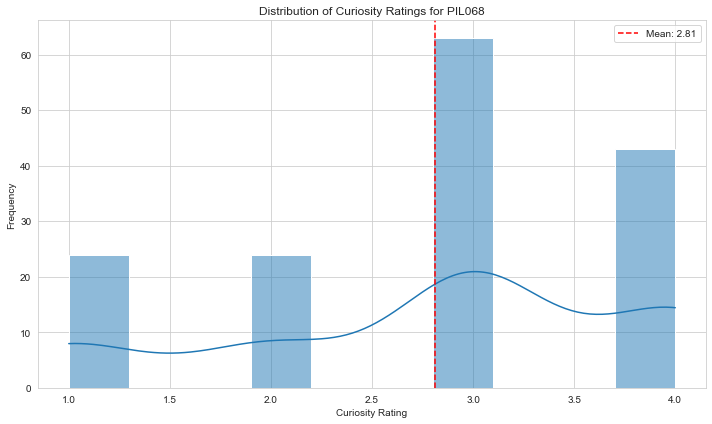

Summary statistics for curiosity ratings:
count    154.000000
mean       2.811688
std        1.014725
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: curiosity_rating, dtype: float64


In [15]:
# plot distribution of curiosity ratings

# set syle
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# create a histogram for curiosity ratings
sns.histplot(data=filtered_no_conf4, x='curiosity_rating', kde=True, bins=10)
plt.title(f'Distribution of Curiosity Ratings for {subject_id}')
plt.xlabel('Curiosity Rating')
plt.ylabel('Frequency')

# Add a vertical line for the mean
plt.axvline(x=filtered_no_conf4['curiosity_rating'].mean(), color='red', linestyle='--', 
           label=f'Mean: {filtered_no_conf4["curiosity_rating"].mean():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Print some summary statistics
print("Summary statistics for curiosity ratings:")
print(filtered_no_conf4['curiosity_rating'].describe())


## Next, ensure accuracy
Participants need to have been accurate on > 50% of the "pointy"/"rounded" judgements in order to move on to Part 2. Make a code that counts proportion "correct" based on person ratings

In [16]:
# make "accuracy" dictionary based on human RA ratings
accuracy_dict = {
    'novel001.jpg': 'rounded',
    'novel003.jpg': 'pointy',
    'novel004.jpg': 'pointy',
    'novel005.jpg': 'pointy',
    'novel010.jpg': 'rounded',
    'novel011.jpg': 'pointy',
    'novel013.jpg': 'pointy',
    'novel014.jpg': 'rounded',
    'novel015.jpg': 'pointy',
    'novel017.jpg': 'rounded',
    'novel019.jpg': 'pointy',
    'novel022.jpg': 'pointy',
    'novel027.jpg': 'rounded',
    'novel031.jpg': 'pointy',
    'novel032.jpg': 'rounded',
    'novel033.jpg': 'rounded',
    'novel037.jpg': 'rounded',
    'novel046.jpg': 'rounded',
    'novel049.jpg': 'rounded',
    'novel056.jpg': 'pointy',
    'novel058.jpg': 'rounded',
    'novel059.jpg': 'rounded',
    'novel064.jpg': 'rounded',
    'novel067.jpg': 'rounded',
    'novel069.jpg': 'rounded',
    'novel071.jpg': 'rounded',
    'novel073.jpg': 'rounded',
    'novel075.jpg': 'pointy',
    'novel076.jpg': 'rounded',
    'novel077.jpg': 'rounded',
    'novel078.jpg': 'pointy',
    'novel079.jpg': 'pointy',
    'novel080.jpg': 'rounded',
    'novel082.jpg': 'rounded',
    'novel085.jpg': 'rounded',
    'novel087.jpg': 'rounded',
    'novel088.jpg': 'rounded',
    'novel090.jpg': 'pointy',
    'novel091.jpg': 'rounded',
    'novel092.jpg': 'rounded',
    'novel093.jpg': 'rounded',
    'novel094.jpg': 'rounded',
    'novel095.jpg': 'rounded',
    'novel097.jpg': 'rounded',
    'novel098.jpg': 'rounded',
    'novel102.jpg': 'rounded',
    'novel103.jpg': 'pointy',
    'novel104.jpg': 'rounded',
    'novel105.jpg': 'rounded',
    'novel106.jpg': 'rounded',
    'novel107.jpg': 'pointy',
    'novel108.jpg': 'rounded',
    'novel109.jpg': 'pointy',
    'novel115.jpg': 'rounded',
    'novel118.jpg': 'pointy',
    'novel120.jpg': 'pointy',
    'novel122.jpg': 'rounded',
    'novel123.jpg': 'pointy',
    'novel124.jpg': 'pointy',
    'novel127.jpg': 'rounded',
    'novel129.jpg': 'rounded',
    'novel130.jpg': 'rounded',
    'novel131.jpg': 'rounded',
    'novel132.jpg': 'rounded',
    'novel133.jpg': 'rounded',
    'novel135.jpg': 'rounded',
    'novel136.jpg': 'rounded',
    'novel137.jpg': 'rounded',
    'novel138.jpg': 'rounded',
    'novel139.jpg': 'rounded',
    'novel140.jpg': 'pointy',
    'novel147.jpg': 'rounded',
    'novel149.jpg': 'pointy',
    'novel150.jpg': 'pointy',
    'novel151.jpg': 'pointy',
    'novel152.jpg': 'rounded',
    'novel155.jpg': 'rounded',
    'novel160.jpg': 'pointy',
    'novel161.jpg': 'rounded',
    'novel163.jpg': 'rounded',
    'novel164.jpg': 'rounded',
    'novel166.jpg': 'rounded',
    'novel168.jpg': 'rounded',
    'novel169.jpg': 'rounded',
    'novel171.jpg': 'rounded',
    'novel172.jpg': 'rounded',
    'novel173.jpg': 'pointy',
    'novel174.jpg': 'pointy',
    'novel176.jpg': 'rounded',
    'novel178.jpg': 'rounded',
    'novel182.jpg': 'rounded',
    'novel183.jpg': 'rounded',
    'novel185.jpg': 'pointy',
    'novel186.jpg': 'rounded',
    'novel187.jpg': 'pointy',
    'novel188.jpg': 'rounded',
    'novel189.jpg': 'rounded',
    'novel190.jpg': 'rounded',
    'novel191.jpg': 'rounded',
    'novel192.jpg': 'pointy',
    'novel193.jpg': 'rounded',
    'novel198.jpg': 'pointy',
    'novel199.jpg': 'rounded',
    'novel202.jpg': 'rounded',
    'novel203.jpg': 'rounded',
    'novel205.jpg': 'pointy',
    'novel207.jpg': 'rounded',
    'novel208.jpg': 'rounded',
    'novel209.jpg': 'pointy',
    'novel210.jpg': 'rounded',
    'novel213.jpg': 'rounded',
    'novel215.jpg': 'pointy',
    'novel216.jpg': 'rounded',
    'novel217.jpg': 'rounded',
    'novel220.jpg': 'pointy',
    'novel221.jpg': 'pointy',
    'novel222.jpg': 'rounded',
    'novel224.jpg': 'rounded',
    'novel226.jpg': 'pointy',
    'novel227.jpg': 'rounded',
    'novel228.jpg': 'rounded',
    'novel229.jpg': 'rounded',
    'novel230.jpg': 'pointy',
    'novel233.jpg': 'pointy',
    'novel234.jpg': 'pointy',
    'novel238.jpg': 'pointy',
    'novel239.jpg': 'rounded',
    'novel243.jpg': 'rounded',
    'novel244.jpg': 'rounded',
    'novel252.jpg': 'pointy',
    'novel257.jpg': 'rounded',
    'novel260.jpg': 'pointy',
    'novel262.jpg': 'rounded',
    'novel263.jpg': 'pointy',
    'novel264.jpg': 'rounded',
    'novel265.jpg': 'rounded',
    'novel266.jpg': 'rounded',
    'novel268.jpg': 'rounded',
    'novel269.jpg': 'rounded',
    'novel270.jpg': 'rounded',
    'novel271.jpg': 'rounded',
    'novel272.jpg': 'pointy',
    'novel273.jpg': 'rounded',
    'novel275.jpg': 'rounded',
    'novel276.jpg': 'rounded',
    'novel283.jpg': 'rounded',
    'novel286.jpg': 'pointy',
    'novel287.jpg': 'rounded',
    'novel288.jpg': 'rounded',
    'novel290.jpg': 'rounded',
    'novel294.jpg': 'pointy',
    'novel295.jpg': 'rounded',
    'novel296.jpg': 'rounded',
    'novel303.jpg': 'rounded',
    'novel305.jpg': 'rounded',
    'novel308.jpg': 'rounded',
    'novel309.jpg': 'rounded',
    'novel310.jpg': 'rounded',
    'novel312.jpg': 'pointy',
    'novel316.jpg': 'rounded',
    'novel317.jpg': 'pointy',
    'novel318.jpg': 'rounded',
    'novel321.jpg': 'pointy',
    'novel323.jpg': 'rounded',
    'novel324.jpg': 'rounded',
    'novel325.jpg': 'rounded',
    'novel328.jpg': 'pointy',
    'novel330.jpg': 'rounded',
    'novel334.jpg': 'rounded',
    'novel335.jpg': 'rounded',
    'novel337.jpg': 'rounded',
    'novel338.jpg': 'rounded',
    'novel339.jpg': 'rounded',
    'novel342.jpg': 'rounded',
    'novel343.jpg': 'rounded',
    'novel344.jpg': 'rounded',
    'novel345.jpg': 'pointy',
    'novel346.jpg': 'rounded',
    'novel347.jpg': 'rounded',
    'novel350.jpg': 'rounded',
    'novel351.jpg': 'rounded',
    'novel356.jpg': 'pointy',
    'novel358.jpg': 'rounded',
    'novel359.jpg': 'rounded',
    'novel361.jpg': 'rounded',
    'novel363.jpg': 'rounded',
    'novel367.jpg': 'pointy',
    'novel368.jpg': 'pointy',
    'novel370.jpg': 'rounded',
    'novel371.jpg': 'rounded',
    'novel374.jpg': 'pointy',
    'novel376.jpg': 'rounded',
    'novel377.jpg': 'pointy',
    'novel379.jpg': 'rounded',
    'novel387.jpg': 'rounded',
    'novel388.jpg': 'pointy',
    'novel393.jpg': 'rounded',
    'novel394.jpg': 'rounded',
    'novel395.jpg': 'rounded',
    'novel396.jpg': 'rounded'
}

In [17]:
# create judgement response df

# extract judgement response rows
judgement_responses = pt1_data[pt1_data['response'].isin(['rounded', 'pointy', 'no response'])]

# exclude practice trials by removing rows where image = ["novel002.jpg", "novel008.jpg", "novel201.jpg", "novel023.jpg"]
# practice images
practice_images = ["novel002.jpg", "novel008.jpg", "novel201.jpg", "novel023.jpg"]

# filter out rows where image is in the exclude list
judgement_responses = judgement_responses[~judgement_responses['image'].isin(practice_images)]

# remove unnecessary columns
judgement_responses = judgement_responses[['rt', 'response', 'subject_id', 'image', 'curiosity_label']]

judgement_responses

# save file for later analyses
judgement_responses.to_csv(f'{subject_id}_judgement_responses.csv', index=False)

In [19]:
# count number of 'no response's
judgement_responses[judgement_responses['response'] == 'no response'].shape[0]

6

In [372]:
# add the correct answer column based on the accuracy_dict
judgement_responses['correct_answer'] = judgement_responses['image'].map(accuracy_dict)

# create accuracy column (1 if correct, 0 if wrong or no response)
# initialize all rows with 0 (not accurate)
judgement_responses['accuracy'] = 0
# only set to 1 if response matches correct_answer
mask = (judgement_responses['response'] == judgement_responses['correct_answer'])
judgement_responses.loc[mask, 'accuracy'] = 1

# calculate proportion correct (including 'no response' as incorrect)
proportion_correct = judgement_responses['accuracy'].sum() / len(judgement_responses)

# get rows with incorrect responses
incorrect_responses = judgement_responses[judgement_responses['accuracy'] == 0]

# print results
print("Judgment Accuracy")
print(f"Total trials = {len(judgement_responses)}")
print(f"Number correct = {judgement_responses['accuracy'].sum()}")
print(f"Proportion correct: {proportion_correct:.2f}")
print("")
print("\nIncorrect responses:")

# print incorrect responses to easily double-check and perhaps be lenient
print(incorrect_responses[['image', 'response', 'correct_answer', 'curiosity_label']])

Judgment Accuracy
Total trials = 58
Number correct = 33
Proportion correct: 0.57


Incorrect responses:
             image     response correct_answer curiosity_label
1016  novel120.jpg      rounded         pointy  high-curiosity
1030  novel132.jpg       pointy        rounded   low-curiosity
1037  novel263.jpg      rounded         pointy  high-curiosity
1058  novel266.jpg       pointy        rounded  high-curiosity
1065  novel191.jpg       pointy        rounded  high-curiosity
1079  novel151.jpg  no response         pointy  high-curiosity
1100  novel370.jpg       pointy        rounded  high-curiosity
1121  novel085.jpg  no response        rounded  high-curiosity
1128  novel243.jpg  no response        rounded  high-curiosity
1135  novel046.jpg  no response        rounded  high-curiosity
1142  novel217.jpg  no response        rounded  high-curiosity
1149  novel192.jpg  no response         pointy  high-curiosity
1191  novel031.jpg      rounded         pointy   low-curiosity
1212  novel152

# Create stimuli for the memory and decision-making tasks

In [339]:
# make the js files of trivia questions, answers, and images for the mem and dm task
# creates dataframes containing the questions from the selected high- and low-curiosity questions to be used in the memory and decision task

# make stimuli from selected_questions

# separate high and low curiosity rows and shuffle them
high_curiosity = questions_df[questions_df['curiosity_label'] == 'high-curiosity'].copy()
low_curiosity = questions_df[questions_df['curiosity_label'] == 'low-curiosity'].copy()

# shuffle both dataframes
high_curiosity_shuffled = high_curiosity.sample(n=len(high_curiosity), random_state=42)
low_curiosity_shuffled = low_curiosity.sample(n=len(low_curiosity), random_state=42)

# for high AND low curiosity questions...
    # take the first 16 rows. these are the trivia questions that will be used in the memory RECALL exp
    # take the next 16 rows. these are the images that will be used in the memory RECOGNITION exp
    # take the next 16 rows. these are the images that will be used in the dm exp

# high-curiosity
high_mem_recall_questions = high_curiosity_shuffled.iloc[0:16].copy()
high_mem_rec_images = high_curiosity_shuffled.iloc[16:32].copy()
high_dm_images = high_curiosity_shuffled.iloc[32:48].copy()

# low-curiosity
low_mem_recall_questions = low_curiosity_shuffled.iloc[0:16].copy()
low_mem_rec_images = low_curiosity_shuffled.iloc[16:32].copy()
low_dm_images = low_curiosity_shuffled.iloc[32:48].copy()

# combine high and low curiosity dfs
mem_recall_questions = pd.concat([high_mem_recall_questions, low_mem_recall_questions])
mem_rec_images = pd.concat([high_mem_rec_images, low_mem_rec_images])
dm_images = pd.concat([high_dm_images, low_dm_images])

# rename dm df
dm_stimuli_df = dm_images

# verify the sizes
print("\nVerifying sizes of resulting DataFrames:")
print(f"mem_recall_questions: {len(mem_recall_questions)} rows")
print(f"mem_rec_images: {len(mem_rec_images)} rows")
print(f"dm_images: {len(dm_images)} rows")

##### COMBINE MEM DFs INTO ONE
# add mem_type column to each dataframe before combining
mem_recall_questions['mem_type'] = 'recall_trivia'
mem_rec_images['mem_type'] = 'recog_images'

# combine the dataframes
mem_stimuli_df = pd.concat([mem_recall_questions, mem_rec_images])

# change curiosity_label column name
mem_stimuli_df.rename(columns={'curiosity_label': 'trial_label'}, inplace=True)
dm_stimuli_df.rename(columns={'curiosity_label': 'trial_label'}, inplace=True)


Verifying sizes of resulting DataFrames:
mem_recall_questions: 32 rows
mem_rec_images: 32 rows
dm_images: 32 rows


In [341]:
# now create lists of the novel images to be used in each part

# extract the memory_foil_images and dm_foil_images from raw part 1 data (these are the leftover images that weren't matched during part 1)
# find the first row with non-null values for these columns
memory_foil_row = pt1_data.dropna(subset=["memory_foil_images"]).iloc[0]
dm_foil_row = pt1_data.dropna(subset=["dm_foil_images"]).iloc[0]

# parse the JSON strings to get the lists of images
memory_foil_images = json.loads(memory_foil_row["memory_foil_images"])
dm_foil_images = json.loads(dm_foil_row["dm_foil_images"])

# also make dfs for combining js file below
mem_foil_df = pd.DataFrame({'image': memory_foil_images})
dm_foil_df = pd.DataFrame({'image': dm_foil_images})

# verify the lengths (should be 32 mem, 16 dm)
print(f"Number of memory foil images: {len(memory_foil_images)}")
print(f"Number of DM foil images: {len(dm_foil_images)}")

Number of memory foil images: 32
Number of DM foil images: 16


In [342]:
# save stimuli as .js files, adding in the foil images from the pre-determined data for that subject
mem_dir = 'stimuli/memory_stimuli/' # defined above as well
dm_dir = 'stimuli/dm_stimuli/' # defined above as well

def df_to_js(df, foil_df, filename, variable_name="window.session_info"):
    
    # convert df to list of dictionaries
    records = df.to_dict('records')

    # get list of foil images from the appropriate foil_df
    new_images = foil_df['image'].tolist()
    
    # create the js object structure
    js_object = {
        "stimuli": records,
        "new_images": new_images
    }
    
    # convert to js string format
    js_string = f"{variable_name} = {json.dumps(js_object, indent=2)};"
    
    # write to file
    with open(filename, 'w') as f:
        f.write(js_string)

# save memory stimuli as js
mem_js_path = f'{mem_dir}{subject_id}_mem_stimuli.js'
df_to_js(mem_stimuli_df, mem_foil_df, mem_js_path)

# save decision-making stimuli as js
dm_js_path = f'{dm_dir}{subject_id}_dm_stimuli.js'
df_to_js(dm_stimuli_df, dm_foil_df, dm_js_path)